# kagglenb003-adversarial-validation

## Install cudf

In [ ]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 300, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 300 (delta 74), reused 99 (delta 55), pack-reused 171
Receiving objects: 100% (300/300), 87.58 KiB | 5.15 MiB/s, done.
Resolving deltas: 100% (136/136), done.
Traceback (most recent call last):
  File "rapidsai-csp-utils/colab/env-check.py", line 1, in <module>
    import pynvml
ModuleNotFoundError: No module named 'pynvml'


In [ ]:
# This will update the Colab environment and restart the kernel.  Don't run the next cell until you see the session crash.
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,533 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [910 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit

In [ ]:
# This will install CondaColab.  This will restart your kernel one last time.  Run this cell by itself and only run the next cell once you see the session crash.
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:21
🔁 Restarting kernel...


In [ ]:
# you can now run the rest of the cells as normal
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Found existing installation: cffi 1.14.5
Uninstalling cffi-1.14.5:
  Successfully uninstalled cffi-1.14.5
Found existing installation: cryptography 3.4.5
Uninstalling cryptography-3.4.5:
  Successfully uninstalled cryptography-3.4.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Installing RAPIDS Stable 21.12
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec c

## Config

In [1]:
comp_name = "amex-default-prediction"
nb_name = 'kagglenb003-adversarial-validation'

import sys
import os
from pathlib import Path

if "google.colab" in sys.modules:
    from google.colab import drive
    drive.mount("/content/drive")
    base = f"/content/drive/MyDrive/colab_notebooks/kaggle/{comp_name}/notebooks"
    %cd {base}

KAGGLE_ENV = True if 'KAGGLE_URL_BASE' in set(os.environ.keys()) else False
INPUT_DIR = Path('../input/')

if KAGGLE_ENV:
    OUTPUT_DIR = Path('')
else:
    !mkdir ../input/{nb_name}
    OUTPUT_DIR = INPUT_DIR / nb_name

Mounted at /content/drive
/content/drive/MyDrive/colab_notebooks/kaggle/amex-default-prediction/notebooks
mkdir: cannot create directory ‘../input/kagglenb003-adversarial-validation’: File exists


In [2]:
class CFG(object):
    def __init__(self):
        self.debug = False
        self.params = {
            'loss_function' : 'Logloss',
            'eval_metric' : 'AUC',
            'learning_rate': 0.08,
            'num_boost_round': 5000,
            'early_stopping_rounds': 100,
            'random_state': 127,
            'task_type': 'GPU'
        }
        self.target = 'private'
    
        self.drop_cols = ['S_2', 'month', 'customer_ID', 'fold', self.target]

        self.num_rows = None
        if self.debug:
            self.num_rows = 1000

In [3]:
args = CFG()
print(args.num_rows)

None


## Main

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 165 kB/s 
     |████████████████████████████████| 15.2 MB 57.9 MB/s 
     |████████████████████████████████| 47 kB 5.2 MB/s 


In [ ]:
import gc
import cudf
import cupy
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from catboost import CatBoost
from catboost import Pool
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def process_df(df):
    df = df.drop_duplicates(subset=["customer_ID"], keep="last")
    df['S_2'] = cudf.to_datetime(df['S_2'])
    df['month'] = (df['S_2'].dt.month).astype('int8')
    df = df.reset_index(drop=True)
    df['month'].value_counts(normalize = True)
    return df

In [ ]:
test = cudf.read_parquet(INPUT_DIR / 'amex-data-integer-dtypes-parquet-format/test.parquet', num_rows=args.num_rows)
test = process_df(test)

In [ ]:
# train = cudf.read_parquet('../input/amex-data-integer-dtypes-parquet-format/train.parquet')
# train = process_df(train)

In [ ]:
# test = test.drop_duplicates(subset=["customer_ID"], keep="last")
# test['S_2'] = cudf.to_datetime(test['S_2'])
# test['month'] = (test['S_2'].dt.month).astype('int8')
# test = test.reset_index(drop=True)
# test['month'].value_counts(normalize = True)

In [ ]:
import cffi
print(cffi.__version__)

!pip uninstall cffi
!pip install cffi==1.15.0

import importlib
importlib.reload(cffi)

print(cffi.__version__)


1.15.0
Found existing installation: cffi 1.15.0
Uninstalling cffi-1.15.0:
  Would remove:
    /usr/local/lib/python3.7/site-packages/_cffi_backend.cpython-37m-x86_64-linux-gnu.so
    /usr/local/lib/python3.7/site-packages/cffi-1.15.0.dist-info/*
    /usr/local/lib/python3.7/site-packages/cffi.libs/libffi-9c61262e.so.8.1.0
    /usr/local/lib/python3.7/site-packages/cffi/*
Proceed (y/n)? y
  Successfully uninstalled cffi-1.15.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached cffi-1.15.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (427 kB)
1.15.0


In [ ]:
test['private'] = 0
test.loc[test['month'] == 4,'private'] = 1
use_cols = [c for c in test.columns if c not in args.drop_cols]

In [ ]:
def get_oof(df, params, use_cols, do_train=False, debug=False):
    kf = KFold(n_splits=5)
    df['fold'] = 999
    for fold, (idx_tr, idx_va) in enumerate(kf.split(df)):
        df.loc[df.index.isin(idx_va),'fold'] = fold
        
    oof = cupy.zeros(len(df))
    # fi_df = pd.DataFrame()
    auc_scores = []
    if not do_train: preds = np.array([])
    for fold in range(5):
        if do_train:
            train_x, train_y = df[df['fold'] != fold][use_cols], df[df['fold'] != fold][args.target]
            valid_x, valid_y = df[df['fold'] == fold][use_cols], df[df['fold'] == fold][args.target]
            trn_data = Pool(train_x.to_pandas(), label=train_y.to_numpy())
            val_data = Pool(valid_x.to_pandas(), label=valid_y.to_numpy())
        else:
            valid_x = df[use_cols]
            val_data = Pool(valid_x.to_pandas(), label=None)
        
        if do_train:
            model = CatBoost(params)
            model.fit(trn_data,
                      eval_set=val_data,
                      verbose_eval=500,
                      use_best_model=True)
        else:
            model = CatBoost()
            model.load_model(OUTPUT_DIR / f"model_fold_{fold}")
        
        pred = model.predict(val_data, prediction_type='Probability')
        pred = pred[:, 1]
        if do_train: 
            model.save_model(OUTPUT_DIR / f"model_fold_{fold}")
            auc_score = roc_auc_score(valid_y.to_numpy(),pred)
            print(f'auc_score of fold {fold}: {auc_score}')
            auc_scores.append(auc_score)
            if debug: 
                display(oof)
                print(valid_x.index.to_numpy())
                display()
            oof[valid_x.index.to_numpy()] = pred
        else:
            auc_score = None
            preds = np.concatenate((preds, pred))
    
    if not do_train: oof = np.mean(preds.reshape(5, -1), axis=0)
    
    return oof, auc_scores

In [ ]:
# def get_oof(df, params, use_cols, do_train=False, model=None):
#     kf = KFold(n_splits=5)
#     df['fold'] = 999
#     for fold, (idx_tr, idx_va) in enumerate(kf.split(df)):
#         df.loc[df.index.isin(idx_va),'fold'] = fold
        
#     oof = cupy.zeros(len(df))
#     # fi_df = pd.DataFrame()
    
#     if do_train:
#         auc_scores = []
#         for fold in range(5):
#             train_x, train_y = df[df['fold'] != fold][use_cols], df[df['fold'] != fold][TARGET]
#             valid_x, valid_y = df[df['fold'] == fold][use_cols], df[df['fold'] == fold][TARGET]
            
#             trn_data = Pool(train_x.to_pandas(), label=train_y.to_array())
#             val_data = Pool(valid_x.to_pandas(), label=valid_y.to_array())
            
#             model = CatBoost(params)
#             model.fit(trn_data,
#                       eval_set=val_data,
#                       verbose_eval=500,
#                       use_best_model=True)

#             pred = model.predict(val_data)
            
#             auc_score = roc_auc_score(valid_y.to_array(),pred)
#             print(f'auc_score of fold {fold}: {auc_score}')
#             auc_scores.append(auc_score)
#             oof[valid_x.index] = pred
            
#             # ToDo: save fold model
            
#         return oof, auc_scores
            
#     else:
#         valid_x = df[use_cols]
#         val_data = Pool(valid_x.to_pandas(), label=None)
#         pred = model.predict(val_data)
#         return pred

### Train

In [ ]:
oof, auc_scores = get_oof(test, args.params, use_cols, do_train=True, debug=False)
print(f'Average AUC Score: {np.mean(auc_scores)}')

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.9885181	best: 0.9885181 (0)	total: 10.7ms	remaining: 53.6s
500:	test: 0.9971965	best: 0.9971965 (500)	total: 4.14s	remaining: 37.2s
1000:	test: 0.9973841	best: 0.9973848 (999)	total: 8.26s	remaining: 33s
1500:	test: 0.9974946	best: 0.9974946 (1500)	total: 12.4s	remaining: 28.9s
2000:	test: 0.9975581	best: 0.9975588 (1995)	total: 16.5s	remaining: 24.7s
2500:	test: 0.9976023	best: 0.9976026 (2486)	total: 20.6s	remaining: 20.6s
3000:	test: 0.9976248	best: 0.9976248 (3000)	total: 24.7s	remaining: 16.5s
3500:	test: 0.9976403	best: 0.9976411 (3488)	total: 28.8s	remaining: 12.3s
bestTest = 0.9976439476
bestIteration = 3569
Shrink model to first 3570 iterations.
auc_score of fold 0: 0.9976438906391416


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.9909930	best: 0.9909930 (0)	total: 10.6ms	remaining: 53.2s
500:	test: 0.9973454	best: 0.9973454 (500)	total: 4.21s	remaining: 37.8s
1000:	test: 0.9975459	best: 0.9975459 (1000)	total: 8.36s	remaining: 33.4s
1500:	test: 0.9976273	best: 0.9976275 (1498)	total: 12.5s	remaining: 29.1s
2000:	test: 0.9976698	best: 0.9976700 (1992)	total: 16.6s	remaining: 24.9s
2500:	test: 0.9976991	best: 0.9976993 (2496)	total: 20.8s	remaining: 20.8s
3000:	test: 0.9977332	best: 0.9977337 (2998)	total: 25s	remaining: 16.6s
3500:	test: 0.9977605	best: 0.9977609 (3493)	total: 29.1s	remaining: 12.5s
bestTest = 0.9977773428
bestIteration = 3841
Shrink model to first 3842 iterations.
auc_score of fold 1: 0.9977773720458221


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.9906583	best: 0.9906583 (0)	total: 13.1ms	remaining: 1m 5s
500:	test: 0.9972841	best: 0.9972843 (498)	total: 4.35s	remaining: 39.1s
1000:	test: 0.9975112	best: 0.9975112 (1000)	total: 8.49s	remaining: 33.9s
1500:	test: 0.9975979	best: 0.9975984 (1495)	total: 12.7s	remaining: 29.6s
2000:	test: 0.9976417	best: 0.9976426 (1993)	total: 16.8s	remaining: 25.2s
2500:	test: 0.9976889	best: 0.9976890 (2499)	total: 21s	remaining: 21s
3000:	test: 0.9977186	best: 0.9977192 (2989)	total: 25.1s	remaining: 16.7s
3500:	test: 0.9977442	best: 0.9977446 (3482)	total: 29.2s	remaining: 12.5s
4000:	test: 0.9977686	best: 0.9977688 (3999)	total: 33.4s	remaining: 8.33s
bestTest = 0.997769177
bestIteration = 4042
Shrink model to first 4043 iterations.
auc_score of fold 2: 0.9977691543896221


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.9879056	best: 0.9879056 (0)	total: 10.7ms	remaining: 53.7s
500:	test: 0.9971842	best: 0.9971842 (500)	total: 4.19s	remaining: 37.6s
1000:	test: 0.9973969	best: 0.9973969 (1000)	total: 8.3s	remaining: 33.1s
1500:	test: 0.9975200	best: 0.9975203 (1497)	total: 12.4s	remaining: 29s
2000:	test: 0.9975917	best: 0.9975929 (1987)	total: 16.5s	remaining: 24.8s
2500:	test: 0.9976293	best: 0.9976296 (2493)	total: 20.6s	remaining: 20.6s
3000:	test: 0.9976633	best: 0.9976633 (3000)	total: 24.7s	remaining: 16.5s
3500:	test: 0.9976915	best: 0.9976922 (3416)	total: 28.8s	remaining: 12.3s
bestTest = 0.9976922274
bestIteration = 3416
Shrink model to first 3417 iterations.
auc_score of fold 3: 0.9976922665947618


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.9877202	best: 0.9877202 (0)	total: 10.9ms	remaining: 54.6s
500:	test: 0.9971977	best: 0.9971977 (500)	total: 4.17s	remaining: 37.4s
1000:	test: 0.9974083	best: 0.9974083 (1000)	total: 8.29s	remaining: 33.1s
1500:	test: 0.9974993	best: 0.9974993 (1500)	total: 12.5s	remaining: 29.1s
2000:	test: 0.9975588	best: 0.9975588 (2000)	total: 16.7s	remaining: 25.1s
2500:	test: 0.9975877	best: 0.9975881 (2467)	total: 20.9s	remaining: 20.9s
3000:	test: 0.9976144	best: 0.9976150 (2996)	total: 25s	remaining: 16.7s
3500:	test: 0.9976347	best: 0.9976349 (3493)	total: 29.2s	remaining: 12.5s
4000:	test: 0.9976533	best: 0.9976537 (3991)	total: 33.3s	remaining: 8.32s
4500:	test: 0.9976700	best: 0.9976701 (4499)	total: 37.5s	remaining: 4.15s
bestTest = 0.9976733923
bestIteration = 4607
Shrink model to first 4608 iterations.
auc_score of fold 4: 0.9976733683287375
Average AUC Score: 0.997711210399617


In [ ]:
print(auc_scores)

[0.9976438906391416, 0.9977773720458221, 0.9977691543896221, 0.9976922665947618, 0.9976733683287375]


In [ ]:
roc_auc_score(test['private'].to_numpy(), cupy.asnumpy(oof))
#roc_auc_score(valid_y.to_array(),pred)

0.9977107737585628

In [ ]:
# binary step
roc_auc_score(test['private'].to_numpy(), np.heaviside(cupy.asnumpy(oof), 0))

0.5

In [ ]:
# sigmoid
def sigmoid(a):
    return 1 / (1 + np.exp(-a))
roc_auc_score(test['private'].to_numpy(), sigmoid(cupy.asnumpy(oof)))

0.9977107737585628

In [ ]:
# test['private'].to_array().shape

In [ ]:
print(type(oof))
print(oof.shape)
print()
print(oof)

<class 'cupy._core.core.ndarray'>
(924621,)

[0.00396666 0.99999988 0.00689191 ... 0.9999987  0.99999999 0.9999999 ]


In [ ]:
del oof
gc.collect()

109

### Inference

In [ ]:
train = cudf.read_parquet(INPUT_DIR / 'amex-data-integer-dtypes-parquet-format/train.parquet', num_rows=args.num_rows)
train = process_df(train)
oof, _ = get_oof(train, args.params, use_cols, do_train=False)

In [ ]:
print(type(oof))
print(oof.shape)
print()
print(oof)

<class 'numpy.ndarray'>
(458913,)

[0.99999841 0.99999961 0.99999945 ... 0.99999947 0.99999969 0.99999934]


In [ ]:
train['private'] = oof
print(type(train))
display(train)

<class 'cudf.core.dataframe.DataFrame'>


,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_139,D_140,D_141,D_142,D_143,D_144,D_145,month,fold,private
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2018-03-13,0.934745,0,0.009382,1.007647,0.006104,0.135021254,0.0,0.007174,...,0,0,0.000000,<NA>,0,0.002970,0,3,0,0.999998
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,2018-03-25,0.880519,6,0.034684,1.004028,0.006911,0.165509477,0.0,0.005068,...,0,0,0.000000,<NA>,0,0.003169,0,3,0,1.000000
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,2018-03-12,0.880875,0,0.004284,0.812649,0.006450,<NA>,0.0,0.007196,...,0,0,0.000000,<NA>,0,0.000834,0,3,0,0.999999
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,2018-03-29,0.621776,0,0.012564,1.006183,0.007829,0.287765533,0.0,0.009937,...,0,0,0.000000,<NA>,0,0.005560,0,3,0,1.000000
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,2018-03-30,0.871900,0,0.007679,0.815746,0.001247,<NA>,0.0,0.005528,...,0,0,0.000000,<NA>,0,0.006944,0,3,0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,2018-03-31,0.844229,15,0.028515,1.009866,0.001928,0.128706709,0.0,0.005893,...,0,0,0.000000,<NA>,0,0.003009,0,3,4,0.999999
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,2018-03-22,0.831279,1,0.292360,0.055656,0.006953,<NA>,0.0,0.233078,...,0,0,0.000000,<NA>,0,0.009230,0,3,4,1.000000
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,2018-03-07,0.800522,9,0.020563,1.007023,0.000957,0.066648334,0.0,0.006314,...,0,0,0.000000,<NA>,0,0.000340,0,3,4,0.999999
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,2018-03-23,0.754129,0,0.015838,0.714486,0.000993,0.40884921,0.0,0.050048,...,1,0,0.949723,0.44625473,1,0.002502,2,3,4,1.000000


(array([  6032.,   4715.,   3525.,   2942.,   2698.,   2396.,   1979.,
          1460.,   1015., 432151.]),
 array([1.04896480e-04, 1.00094405e-01, 2.00083913e-01, 3.00073422e-01,
        4.00062930e-01, 5.00052439e-01, 6.00041947e-01, 7.00031456e-01,
        8.00020964e-01, 9.00010473e-01, 9.99999981e-01]),
 <a list of 10 Patch objects>)

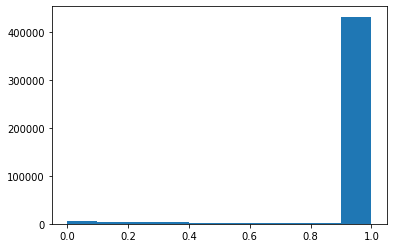

In [ ]:
plt.hist(train['private'].to_numpy())

In [ ]:
(train['private']>=0.9).mean()

0.9416839357350958

In [ ]:
train[train['private']>=0.9].shape

(432151, 193)

In [ ]:
train[train['private']<0.9].shape

(26762, 193)

In [ ]:
train.to_parquet(OUTPUT_DIR / 'train_adv_valid.parquet')

## EDA

In [4]:
import pandas as pd
train = pd.read_parquet(OUTPUT_DIR / 'train_adv_valid.parquet')
train.shape

(458913, 193)

In [ ]:
thress = [0.9, 0.95, 0.97, 0.98, 0.99, 0.99999, 0.999999]
for thres in thress:
    print(thres, (train['private']>=thres).mean())

0.9 0.9416839357350958
0.95 0.9408755036357653
0.97 0.9406467020982191
0.98 0.9405377489851018
0.99 0.940470198054969
0.99999 0.8500652629147573
0.999999 0.4205110772630106


In [ ]:
thress = [0.99999, 0.999995, 0.999997, 0.999998]
for thres in thress:
    print(thres, (train['private']>=thres).mean())

0.99999 0.8500652629147573
0.999995 0.7799844414954469
0.999997 0.6931597056522696
0.999998 0.6031012414117709


In [6]:
thress = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for thres in thress:
    print(thres, (train['private']<thres).mean())

0.1 0.013133208255159476
0.2 0.02341620307117035
0.3 0.031079965047841312
0.4 0.037506019659499734
0.5 0.04338948776783399
0.6 0.04861052094841506
0.7 0.05292070610333549
0.8 0.05610431606862303
0.9 0.05831606426490424


In [ ]:
train[train['private']>=0.999999].shape

(192978, 193)

In [7]:
train[train['private']<0.5].shape

(19912, 193)

In [ ]:
train.shape

(458913, 193)

In [ ]:
# kf = KFold(n_splits=3)
# test['fold'] = 999
# for fold, (idx_tr, idx_va) in enumerate(kf.split(test)):
#     test.loc[test.index.isin(idx_va),'fold'] = fold

In [ ]:
# TARGET = 'private'
# drop_cols = ['S_2','month','customer_ID','fold',TARGET]
# use_cols = [c for c in test.columns if c not in drop_cols]

In [ ]:
# oof = cupy.zeros(len(test))
# fi_df = pd.DataFrame()
# for fold in range(3):
#     train_x,train_y = test[test['fold'] != fold][use_cols],test[test['fold'] != fold][TARGET]
#     valid_x,valid_y = test[test['fold'] == fold][use_cols],test[test['fold'] == fold][TARGET]

#     trn_data = Pool(train_x.to_pandas(), label=train_y.to_array())
#     val_data = Pool(valid_x.to_pandas(), label=valid_y.to_array())

#     model = CatBoost(cat_params)
#     model.fit(trn_data,
#             eval_set=val_data,
#             verbose_eval=500,
#             use_best_model=True
#           )


#     pred = model.predict(val_data)
#     auc_score = roc_auc_score(valid_y.to_array(),pred)
#     oof[valid_x.index] = pred

#     fi_df[f'fold_{fold}'] = model.get_feature_importance(Pool(train_x.to_pandas(), train_y.to_array()))

In [ ]:
# fi_df['importance'] = fi_df.mean(axis=1)
# fi_df['features'] = use_cols
# plt.figure(figsize=(10, 10))
# sns.barplot(x="importance", y="features", data=fi_df.sort_values(by="importance", ascending=False)[:30])
# plt.title('CatBoost Features')
# plt.tight_layout()

The AUC score is above 0.99 and a check of the feature importance shows a significant difference in 'B_29'.

In [ ]:
# test = test.to_pandas()
# plt.hist(test[(test['private'] == 0) & (test['B_29']<0.02)]['B_29'],label='public')
# plt.hist(test[(test['private'] == 1) & (test['B_29']<0.02)]['B_29'],label='private')
# plt.legend()
# plt.xlim(0,0.03)
# plt.show()

In [ ]:
# print('public B_29:',test[test['private'] == 0]['B_29'].isnull().sum())
# print('private B_29:',test[test['private'] == 1]['B_29'].isnull().sum())

The above shows that 'B_29' needs to be analyzed in depth.